In [2]:
import sklearn
sklearn.__version__

'1.3.0'

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
from PacketFeatureTree import bitwise_xor_bytes, byte_list_to_transition, transition_profile_1byte, avg_bit, get_powers_of_two, build_transition_profiles
from APREdatabase import find_filenames_end_with, load_protocols
import pandas as pd

In [9]:
ProtocolsDict = load_protocols(rel_to_root='../../../')

In [14]:
lengths_dict = {
    'UINT8' : 1,
    'UINT32' : 4,
    'UINT16' : 2,
    'IPv4' : 4,
    'ABSOLUTE_TIME' : 8,
    'ETHER' : 6,
    'STRING': 1
}

In [18]:
''' BUILD TRANSITION CSV '''
FULL_DF = build_transition_profiles(ProtocolsDict, ProtocolsDict.keys(), rel_to_root='../../../')
FULL_DF.to_csv("FULL_DF.csv")

ARP
Getting capture csvs for ARP
../../../src/APREdatabase/Protocols/ARP/pcap1/arp_1024.csv
../../../src/APREdatabase/Protocols/ARP/brute_shark/ARP_brute_shark.csv
../../../src/APREdatabase/Protocols/ARP/CIC-DDoS2019/arp.csv
../../../src/APREdatabase/Protocols/ARP/smia/arp_smia.csv
cap_id=0
cap_id=1
cap_id=2
cap_id=3
DHCP
Getting capture csvs for DHCP
../../../src/APREdatabase/Protocols/DHCP/CIC-DDoS2019/dhcp.csv
../../../src/APREdatabase/Protocols/DHCP/smia/smia_dhcp.csv
../../../src/APREdatabase/Protocols/DHCP/netplier/dhcp_100.csv
cap_id=0
cap_id=1
cap_id=2
DNP3
Getting capture csvs for DNP3
../../../src/APREdatabase/Protocols/DNP3/ICS_GitHub/ics_dnp3.csv
../../../src/APREdatabase/Protocols/DNP3/netplier/dnp3_100.csv
cap_id=0
cap_id=1
DNS
Getting capture csvs for DNS
../../../src/APREdatabase/Protocols/DNS/4SICS/udp_dns.csv
../../../src/APREdatabase/Protocols/DNS/CIC-DDoS2019/dns.csv
../../../src/APREdatabase/Protocols/DNS/smia/SMIA_2011-10-14_07_DNS_5411.csv
cap_id=0
cap_id=1
cap_i

In [19]:
pd.set_option('display.max_rows', None)
FULL_DF[['Class','Protocol']].value_counts().sort_index()

Class          Protocol 
ABSOLUTE_TIME  ICMP            72
               NTPv4          320
               PMU            128
               S7Comm          20
               SMB2           176
BOOLEAN        DNP3             1
               MQTT             1
               PMU             32
               TCP             29
BYTES          DHCP          1318
               MQTT            45
               ModBus           3
               NTPv4           80
               PMU           6098
               S7Comm         153
               SMB            270
               SMB2          1857
               TCP            428
CHAR           USB              8
ETHER          ARP            276
               DHCP           384
               ETHERNET       168
               NBNS             6
GUID           SMB2           288
INT16          DNP3             8
               USBMouse        28
INT32          USB             32
INT8           USBMouse        21
IPv4           ARP     

In [20]:
TrainDF = FULL_DF[FULL_DF['Class'].isin(lengths_dict.keys())]
TrainDF.head()

,Bit 0 TP,Bit 1 TP,Bit 2 TP,Bit 3 TP,Bit 4 TP,Bit 5 TP,Bit 6 TP,Bit 7 TP,Bit 0 AV,Bit 1 AV,...,Bit 4 AV,Bit 5 AV,Bit 6 AV,Bit 7 AV,Class,Index,Length,Protocol,Trace ID,# Trace Fields
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,UINT16,1,2,ARP,0_4811763454999924262_32,9
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,UINT16,1,2,ARP,0_4811763454999924262_64,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,UINT16,1,2,ARP,0_4811763454999924262_128,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,UINT16,1,2,ARP,0_4811763454999924262_256,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,UINT16,1,2,ARP,0_4811763454999924262_512,9


In [21]:
### Print for Paper Example ###
ex = TrainDF[(TrainDF['Protocol']=='ModBus') & (FULL_DF['Trace ID']=='0_2919569041975147250_512')].tail(8).round(2)
ex.to_csv('modbus.csv')
ex

/tmp/ipykernel_604762/34498469.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ex = TrainDF[(TrainDF['Protocol']=='ModBus') & (FULL_DF['Trace ID']=='0_2919569041975147250_512')].tail(8).round(2)


,Bit 0 TP,Bit 1 TP,Bit 2 TP,Bit 3 TP,Bit 4 TP,Bit 5 TP,Bit 6 TP,Bit 7 TP,Bit 0 AV,Bit 1 AV,...,Bit 4 AV,Bit 5 AV,Bit 6 AV,Bit 7 AV,Class,Index,Length,Protocol,Trace ID,# Trace Fields


In [22]:
TrainDF['Protocol'].value_counts()

Protocol
DNS          29112
DHCP         18716
SMB2          2117
S7Comm        1540
SMB           1188
NBNS           663
ARP            644
ModBus         560
NTPv4          440
PMU            384
TCP            327
USB            280
FTPv6          231
DNP3           220
IP             220
ICMP           208
ETHERNET       196
UDP            168
MQTT            90
NBDGM           82
ModBusTCP       77
EAPOL           16
USBMouse         7
Name: count, dtype: int64

In [23]:
from PacketFeatureTree import distribute_items, remove_unique_rows, get_train_cv, split_by_many_proto, split_by_proto, build_byte_models, full_save, add_patches

In [25]:
!pwd

/home/ajr/apre-benchmark-database/src/PacketFeatureTree/Training


	 ARP
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.586310599009728
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.592100926652671
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.66477969785674
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5838932201968134
best Stochastic Gradient Descent 1.5838932201968134


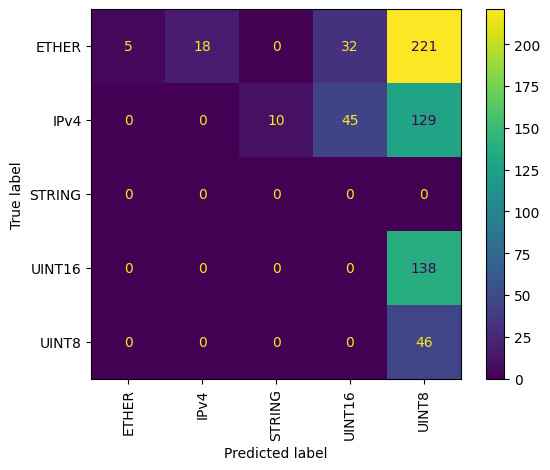

	 DHCP
uniform loss 1.945910149055313
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.3753138928242956
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.3796278757091247
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.3472618270058765
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.3459772094339502
best Stochastic Gradient Descent 1.3459772094339502


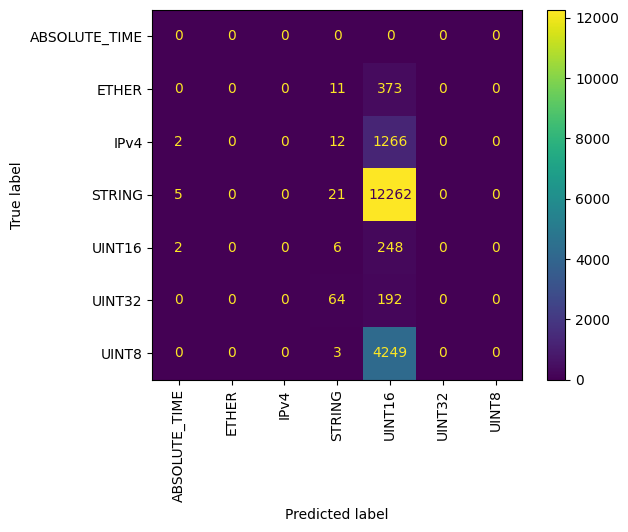

	 DNP3
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.597005154450838
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5950052817280802
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6172622242310675
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5934831713227948
best Stochastic Gradient Descent 1.5934831713227948


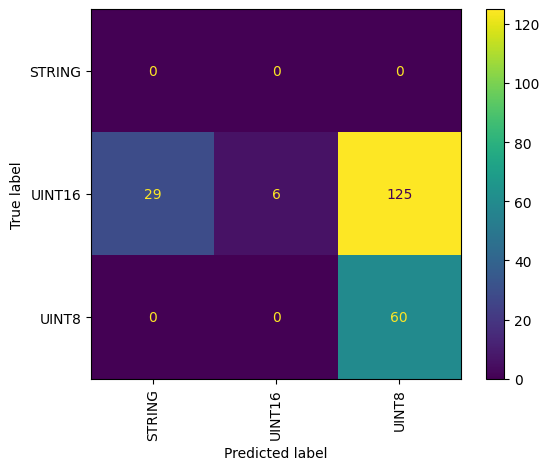

	 DNS
uniform loss 1.945910149055313
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.468075490585833
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5351381207844872
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.516290926570945
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.4757925789668256
best Logistic Regression 1.468075490585833


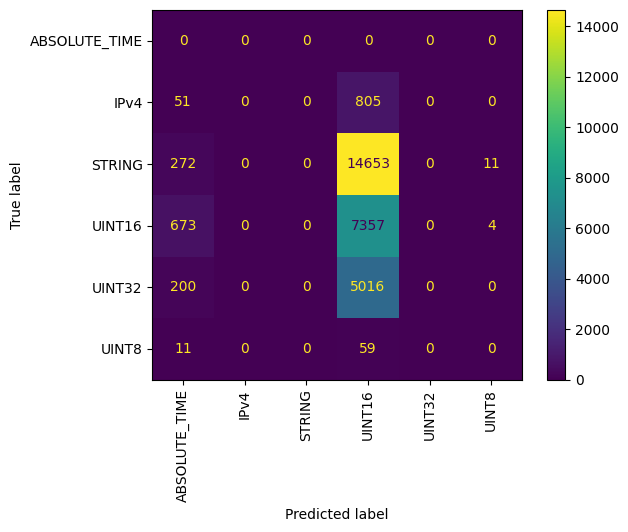

	 EAPOL
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5887955919043055
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.586893691596824
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.622834877664377
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5788138398086566
best Stochastic Gradient Descent 1.5788138398086566


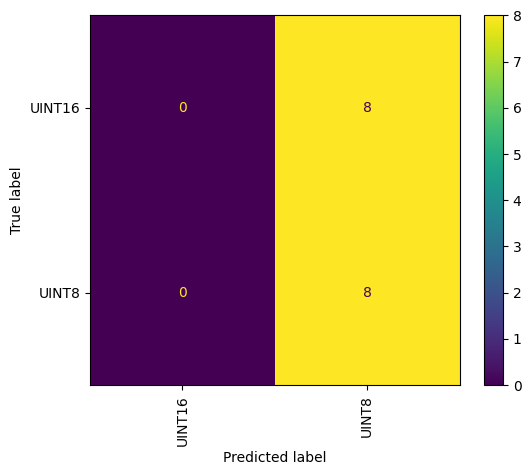

	 ETHERNET
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5976608015293015
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5833795286611918
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6221398817833554
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5817701782845133
best Stochastic Gradient Descent 1.5817701782845133


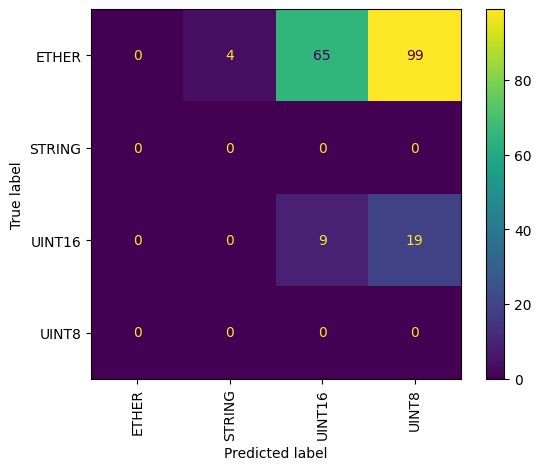

	 FTPv6
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5888267731791976
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5858028926255519
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6211389261158953
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5800821588386156
best Stochastic Gradient Descent 1.5800821588386156


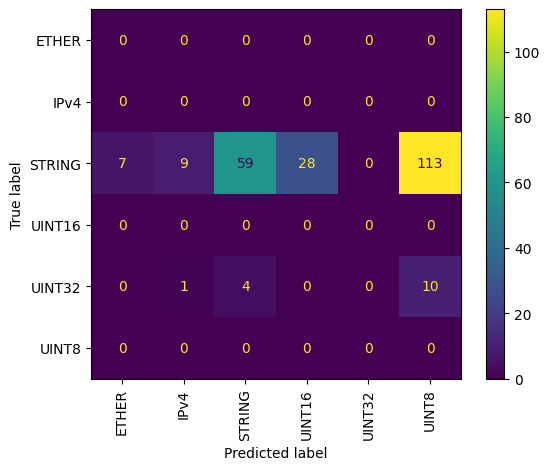

	 ICMP
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.597980200902554
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5868973013947216
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.620805337001479
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5873491853358188
best Gradient Boosting 1.5868973013947216


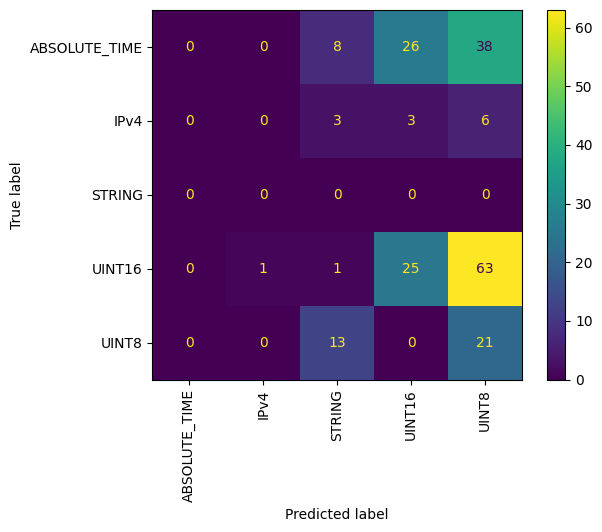

	 ModBus
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5996812483579441
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5873282883944364
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.619612453997765
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5841062146399245
best Stochastic Gradient Descent 1.5841062146399245


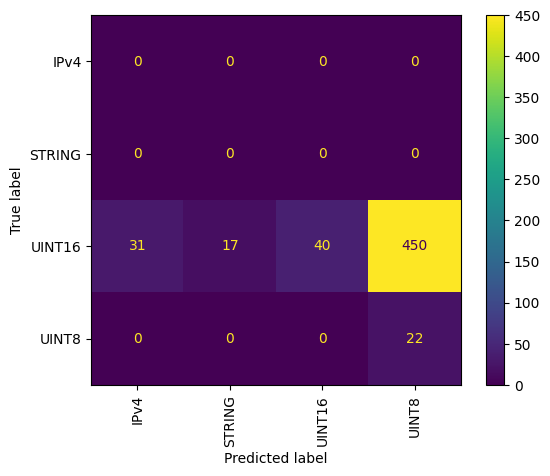

	 ModBusTCP
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5968239104765405
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5810233969797292
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6176505261265437
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.577824653305968
best Stochastic Gradient Descent 1.577824653305968


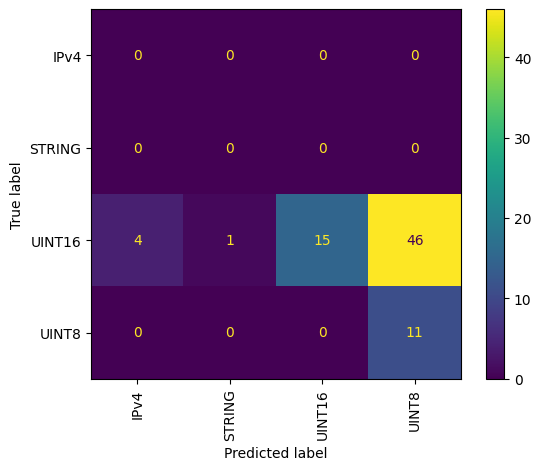

	 MQTT
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5982638844877788
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.58741743627004
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6208095020526345
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5927932969965723
best Gradient Boosting 1.58741743627004


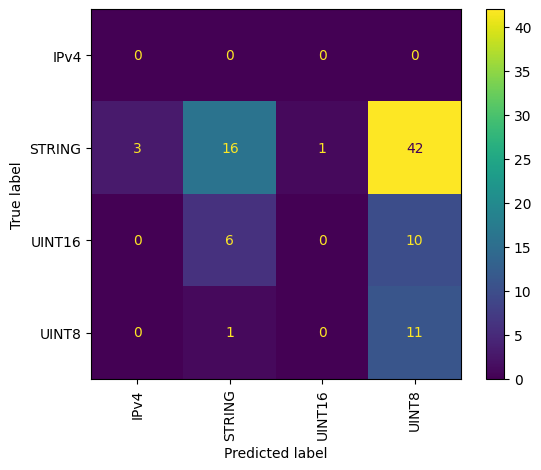

	 NBDGM
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.597499477107068
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.589917541341106
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6166566294612996
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.576817129306075
best Stochastic Gradient Descent 1.576817129306075


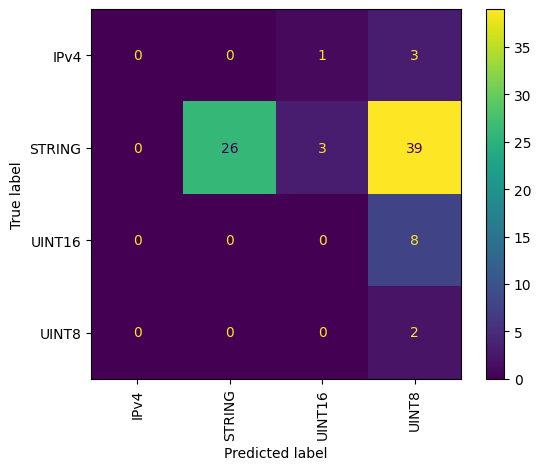

	 NBNS
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.58797451300356
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.597440828073993
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.618560678572132
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5874119782067746
best Stochastic Gradient Descent 1.5874119782067746


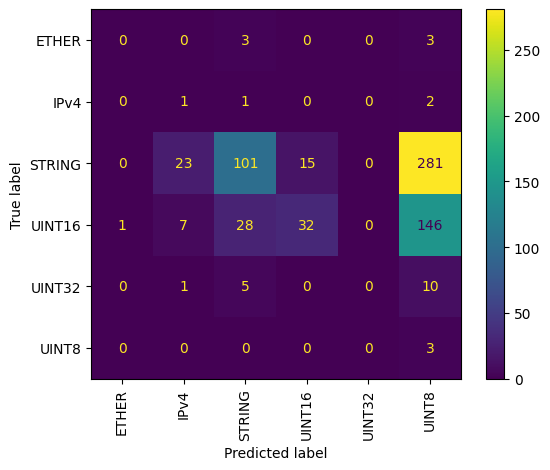

	 NTPv4
uniform loss 1.945910149055313
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5969291637323724
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5990158906653325
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.596169598806756
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5847649814666442
best Stochastic Gradient Descent 1.5847649814666442


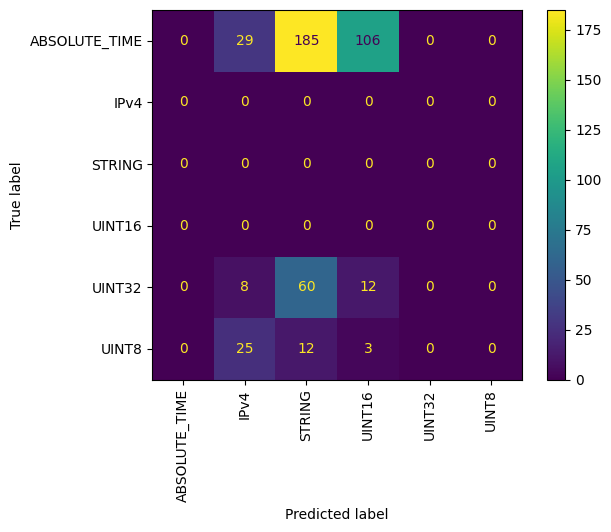

	 PMU
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5959065708770983
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5936109628043231
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6190883031736205
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5859677044983702
best Stochastic Gradient Descent 1.5859677044983702


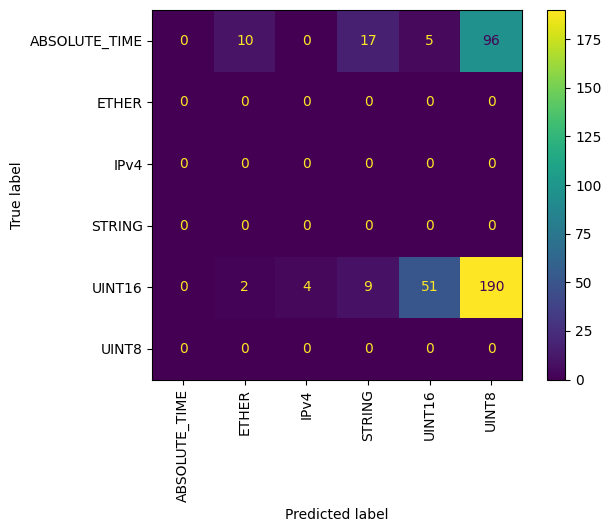

	 SMB
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5971733624111324
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5875090151952267
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6218658438295308
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.589142021165971
best Gradient Boosting 1.5875090151952267


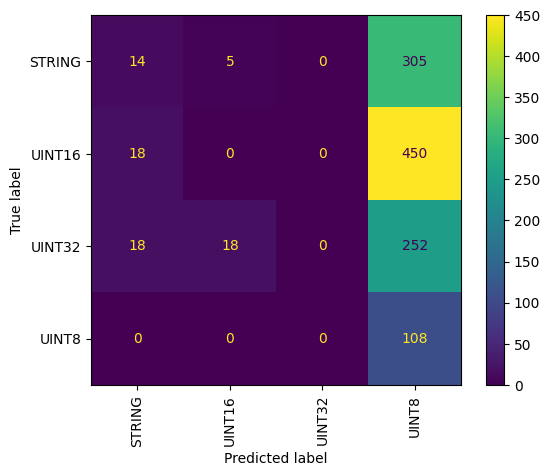

	 SMB2
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5964198302613322
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5877743186604465
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6245974595708734
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5731859183838306
best Stochastic Gradient Descent 1.5731859183838306


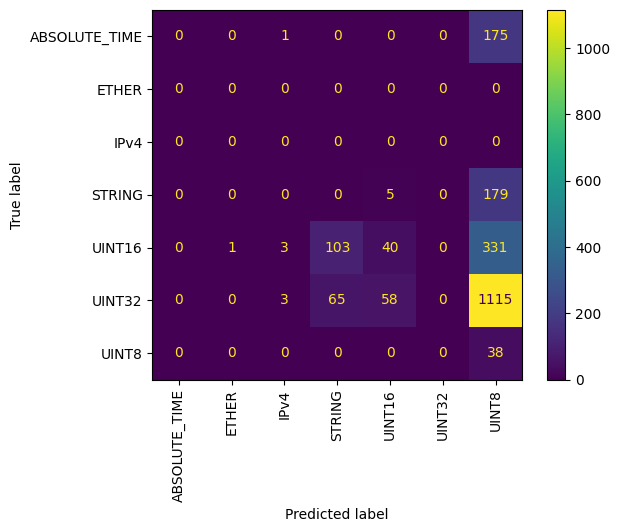

	 S7Comm
uniform loss 1.945910149055313
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.6871644361944247
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.6880953271502017
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6917190462530725
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.6828083023040392
best Stochastic Gradient Descent 1.6828083023040392


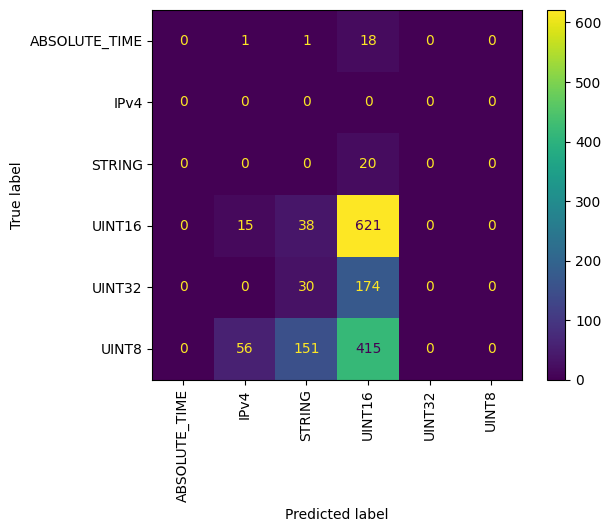

	 USB
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5907800424289935
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5681473791860312
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6165063782011047
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5795548799005712
best Gradient Boosting 1.5681473791860312


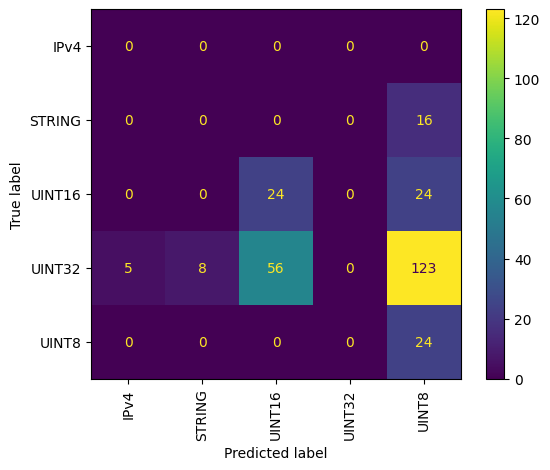

	 UDP
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5990053186220117
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5911686707164228
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.619003822592522
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.587520283834844
best Stochastic Gradient Descent 1.587520283834844


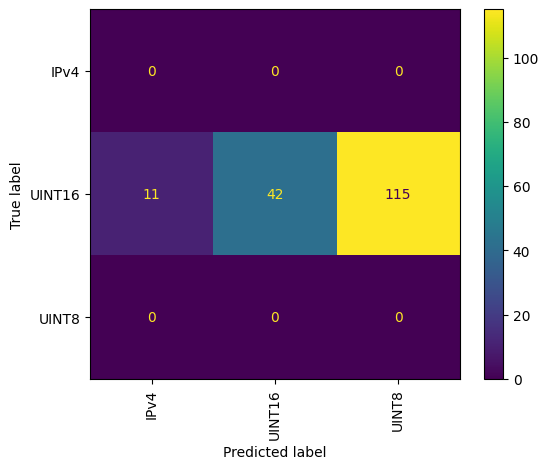

	 TCP
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5962424504401254
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5803380968425476
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6212837113592395
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.6003965337299642
best Gradient Boosting 1.5803380968425476


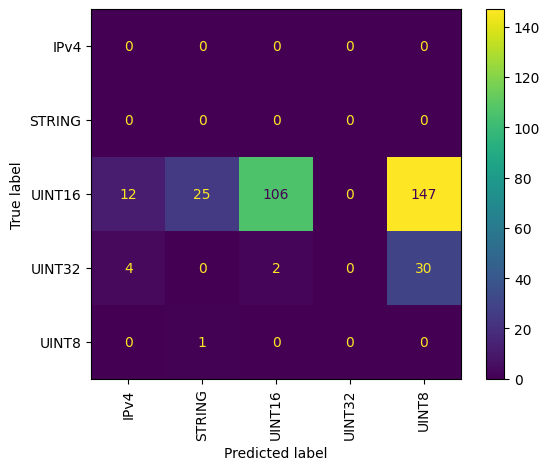

	 IP
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.593731936211708
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5805305428825525
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6245249275776465
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.593073200044701
best Gradient Boosting 1.5805305428825525


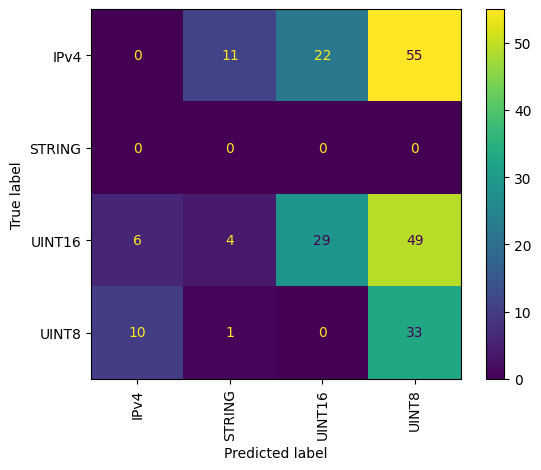

	 USBMouse
uniform loss 1.9459101490553132
---> LogisticRegressionCV(class_weight='balanced', random_state=1337,
                     solver='newton-cg')
method='sigmoid', clf_loss=1.5885486828928428
---> GradientBoostingClassifier(max_depth=8, random_state=1337)
method='sigmoid', clf_loss=1.5869297157703444
---> RandomForestClassifier(class_weight='balanced', criterion='log_loss',
                       random_state=1337)
method='sigmoid', clf_loss=1.6232318068533473
---> SGDClassifier(class_weight='balanced', loss='log_loss', random_state=1337)
method='sigmoid', clf_loss=1.5788192538603731
best Stochastic Gradient Descent 1.5788192538603731


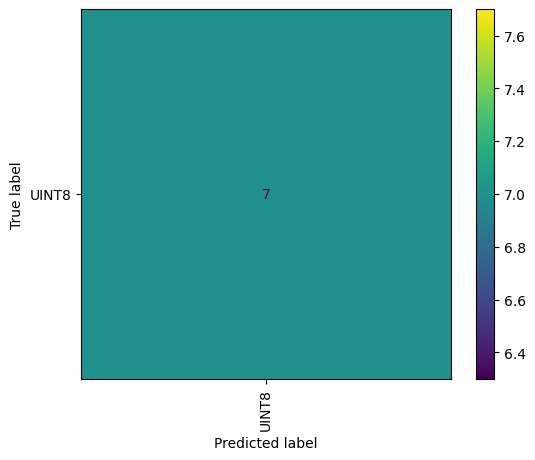

In [26]:
byte_models = build_byte_models(TrainDF)
byte_models = byte_models.round(2)
byte_models.to_csv('model_results.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

uloss = 1.9459101490

fig = plt.figure(figsize=(16,7))
dfm = byte_models.melt('Protocol', var_name='Sklearn Classifier', value_name='Log Loss')

sns.barplot(data=dfm, x='Protocol', y='Log Loss', hue='Sklearn Classifier')
plt.hlines(uloss, 1.5, 16, linestyle='dashed', colors='black')
plt.text(-0.5, uloss, ' Expected Log Loss', ha='left', va='center', size=12)
plt.ylabel('Log Loss', size=14)
plt.xlabel('Protocol', size=14)
plt.xticks(rotation = 25)
plt.legend( prop={'size': 14})
full_save('Plotting/model_performance')

In [ ]:
from PacketFeatureTree import Field, flatten_seq, best

FIELD_OBJECTS = [
    Field("ABSOLUTE_TIME", 8),
    Field("ETHER", 6),
    Field("IPv4", 4),
    Field("STRING", 6),
    Field("UINT16", 2),
    Field("UINT32", 4),
    Field("UINT8", 1)
]

In [ ]:
model.classes_

array(['ABSOLUTE_TIME', 'ETHER', 'IPv4', 'STRING', 'UINT16', 'UINT32',
       'UINT8'], dtype=object)

In [ ]:
import matplotlib
import pandas as pd
import joblib
from matplotlib.backends.backend_pgf import FigureCanvasPgf
import matplotlib.pyplot as plt
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
                         
cs = model.classes_

                         
for proto in TrainDF['Protocol'].unique():
    if proto != 'ModBus':
        continue
    print(proto)
    model = joblib.load( f'ByteLabelModels/clf_ModBus.pkl')
    train, test = split_by_proto(proto, TrainDF)
    for trace_id in test['Trace ID'].value_counts().index:
        print(trace_id)
        if trace_id[0] != '0':
           continue
        trace = test[test['Trace ID']==trace_id].iloc[:, :16]
        obs_p = model.predict_proba(trace)

        n_bytes_remaining = len(obs_p)
        (best_prob, best_path) = best(obs_p, FIELD_OBJECTS)

        best_path = [f.name for f in best_path]

        fig, ax = plt.subplots(figsize=(16,5))
        im = plt.imshow(obs_p.T, interpolation=None, cmap="gray")
        plt.yticks(ticks = range(len(cs)), labels = cs)

        # Get the current reference
        ax = plt.gca()

        true = flatten_seq(test[test['Trace ID']==trace_id]['Class'].tolist(), lengths_dict)

        if len(true)>5:
            continue

        add_patches(ax, true, cs, lengths_dict, c='g')
        add_patches(ax, best_path, cs, lengths_dict, linestyle = 'dotted')

        cbar = plt.colorbar(im, fraction=0.025, pad=0.04)
        cbar.ax.set_ylabel("Class Probability for Byte", rotation=90, va="center", fontsize=14, labelpad=15)
        plt.xlabel('Byte Index', size=14)
        
        for i in range(len(cs)):
            for j in range(len(obs_p)):
                val = obs_p.T[i, j]
                if val < obs_p.max()/2:
                    c='white'
                else:
                    c='black'
                text = ax.text(j, i, str(round(obs_p.T[i, j], 2)), ha="center", va="center", color=c)
        
        plt.ylabel('Field Type', size=14)
        full_save(f'Plotting/FormatClassProbabilities/{proto}_{trace_id}_optimal_temp')

NameError: name 'model' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16,8))
dfm = df.melt('proto', var_name='cols', value_name='Log Loss')

sns.barplot(data=dfm, x='proto', y='Log Loss', hue='cols')
plt.xticks(rotation = 25)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_scoree
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt


# Define the feature columns and the class column
X = df.iloc[:, :16]
y = df['Class']

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Initialize the decision tree classifier
clf = SVC(probability=True)
#clf = GradientBoostingClassifier()
#beamsearch??

# Train the classifier on the training data
clf.fit(X_train, y_train)

plot_confusion_matrix(clf, X_test, y_test)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
calibrated_clf.score(X_test, y_test, sample_weight=[y_test.values.tolist().count(class_)/len(y_test) for class_ in calibrated_clf.classes_])

In [ ]:
for class_ in calibrated_clf.classes_:
    bin_classes = [y_test==class_][0].values
    print(class_, bin_classes.sum())
    if len(bin_classes)>0:
        prob_true, prob_pred = calibration_curve(bin_classes, calibrated_clf.predict_proba(X_test)[:,1])
        plt.plot(prob_true, prob_pred, label=class_)
plt.legend()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, calibrated_clf.predict(X_test)))
#prcision sensitivty curve

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))
#prcision sensitivty curve

In [ ]:
# Define the feature columns and the class column

df2 = df_test#[(df_test.iloc[:, :16] != 0.0).all(axis=1)] #remove just nulls case
X = df2.iloc[:, :16]
y = df2['Class']

plot_confusion_matrix(calibrated_clf, X, y)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
X = df_test[df_test['Trace ID']==my_test].iloc[:, :16]
y = df_test[df_test['Trace ID']==my_test].iloc[:, -6]

plot_confusion_matrix(calibrated_clf, X, y)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
 df_test[df_test['Trace ID']==my_test]

In [ ]:
X = df_test[df_test['Trace ID']==my_test].iloc[:, :16]
obs_p = calibrated_clf.predict_proba(X)
#obs_p += 1/6
#obs_p = clf.predict_proba(X)

fig, ax = plt.subplots(figsize=(5,20))
plt.imshow(obs_p, interpolation=None)
plt.xticks(ticks = range(N_CLASSES) ,labels = clf.classes_, rotation = 'vertical')
ax.xaxis.tick_top()
plt.show()

In [ ]:
for newmodel,targ in zip(best_path, df_test[(df_test['Protocol'] == TEST_PROTO) & (df_test['Trace ID'] == my_test)]['Class'].values):
    print(f'Pred: {newmodel}, Targ: {targ}')